In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data from github and converting into a DataFrame
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
#finding number of rows and columns
data.shape

(4177, 9)

In [5]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
#finding the null values in each column
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
#no. of columns in the dataset
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
#now lets convert the columns having string values into integer values
data.replace({'Sex':{'M':0,'F':1,'I':2}}, inplace=True)

In [10]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


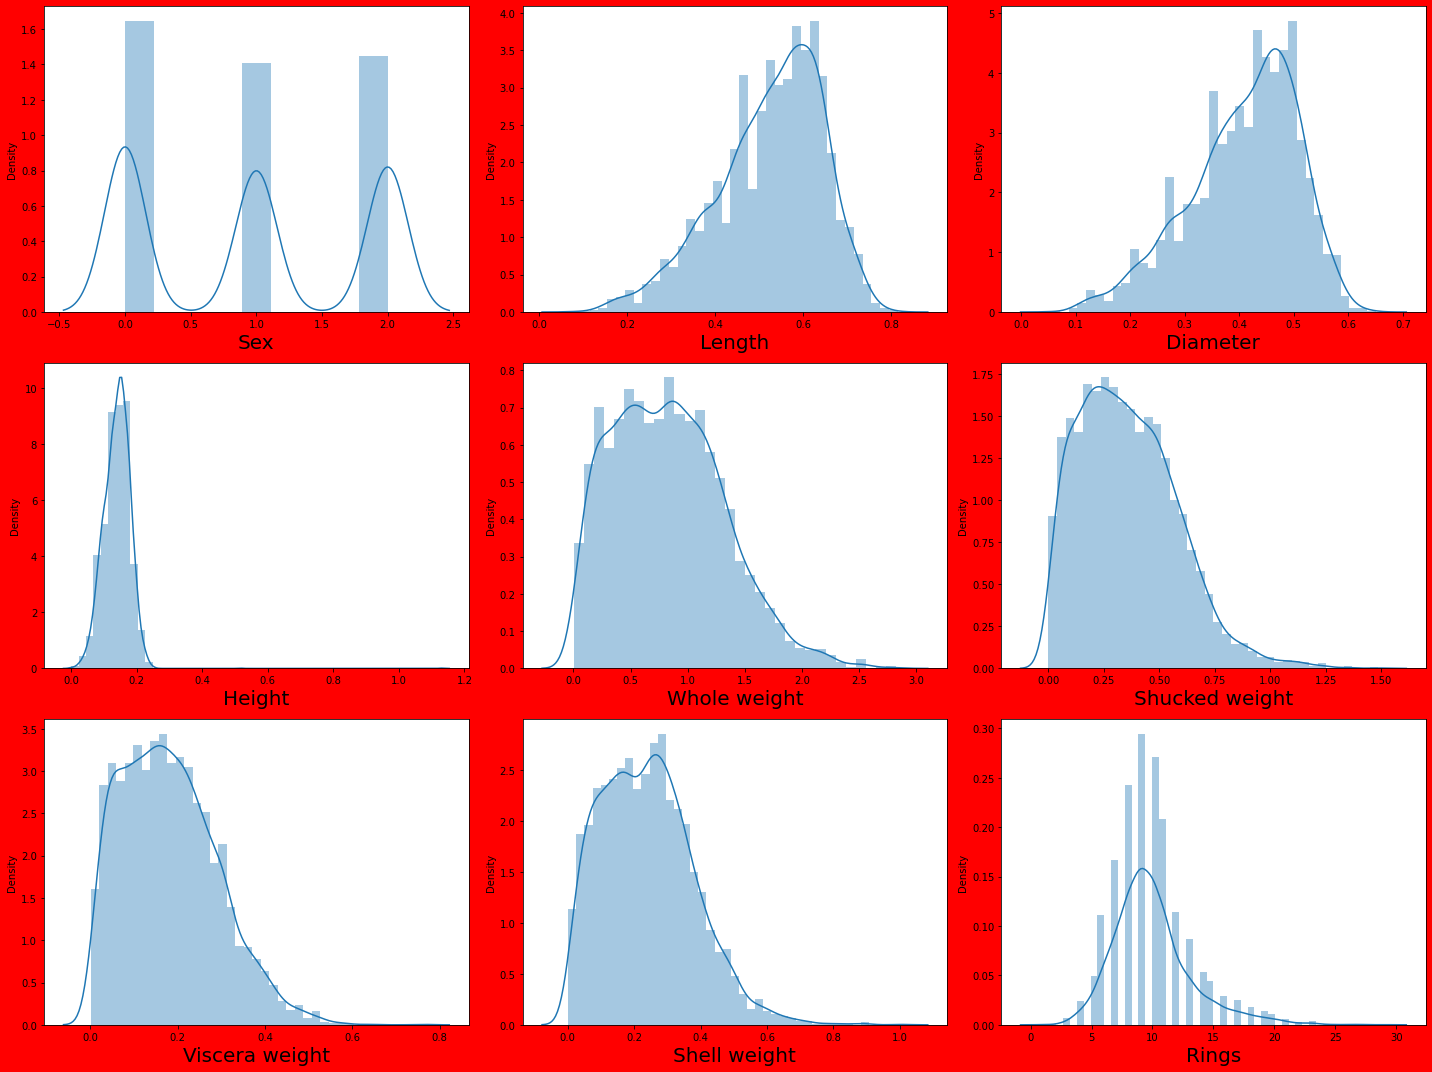

In [12]:
#now the data looks good and there is no missing valuues so we can start visualizing the type of distribution for each feature

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [17]:
data.rename(columns = {'Whole weight':'Whole_weight', 'Shucked weight':'Shucked_weight','Viscera weight':'Viscera_weight','Shell weight':'Shell_weight'}, inplace = True)

In [18]:
df_features=data.drop('Rings', axis=1)

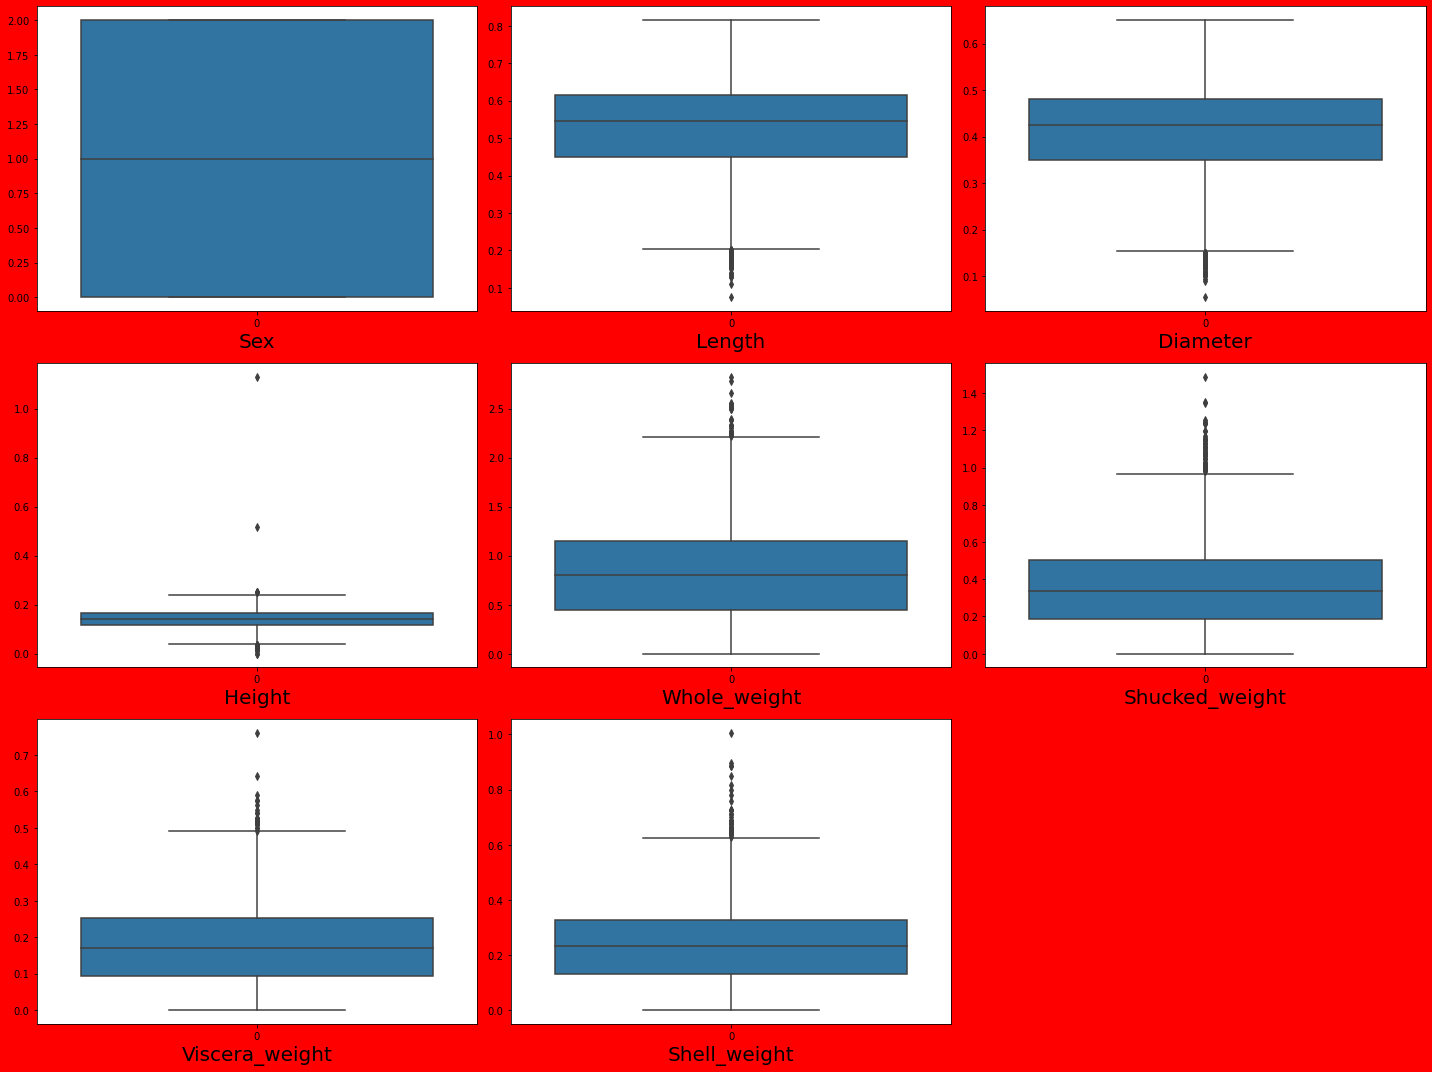

In [19]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=8:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [20]:
data.shape

(4177, 9)

In [21]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

Sex               2.0000
Length            0.1650
Diameter          0.1300
Height            0.0500
Whole_weight      0.7115
Shucked_weight    0.3160
Viscera_weight    0.1595
Shell_weight      0.1990
Rings             3.0000
dtype: float64

In [22]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
#removing the outliers for Height
h_high=q3.Height + (1.5 * iqr.Height)


index=np.where(data['Height'] > h_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(4172, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4167,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4168,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4169,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4170,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
#removing the outliers for Whole_weight
wh_high=q3.Whole_weight + (1.5 * iqr.Whole_weight)


index=np.where(data['Whole_weight'] > wh_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(4144, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4139,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4140,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4141,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4142,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
#removing the outliers for Shucked_weight
sw_high=q3.Shucked_weight + (1.5 * iqr.Shucked_weight)


index=np.where(data['Shucked_weight'] > sw_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(4120, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4115,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4116,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4117,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4118,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
#removing the outliers for Viscera_weight
vw_high=q3.Viscera_weight + (1.5 * iqr.Viscera_weight)


index=np.where(data['Viscera_weight'] > vw_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(4112, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4107,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4108,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4109,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4110,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [27]:
#removing the outliers for Shell_weight
shw_high=q3.Shell_weight + (1.5 * iqr.Shell_weight)


index=np.where(data['Shell_weight'] > shw_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(4088, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4083,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4084,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4085,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4086,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
#removing the outliers for Length
length_low=q1.Length - (1.5 * iqr.Length)


index=np.where(data['Length'] < length_low)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(4039, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4034,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4035,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4036,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4037,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
#removing the outliers for Diameter
d_low=q1.Diameter - (1.5 * iqr.Diameter)


index=np.where(data['Diameter'] < d_low)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(4027, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4022,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4023,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4024,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4025,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


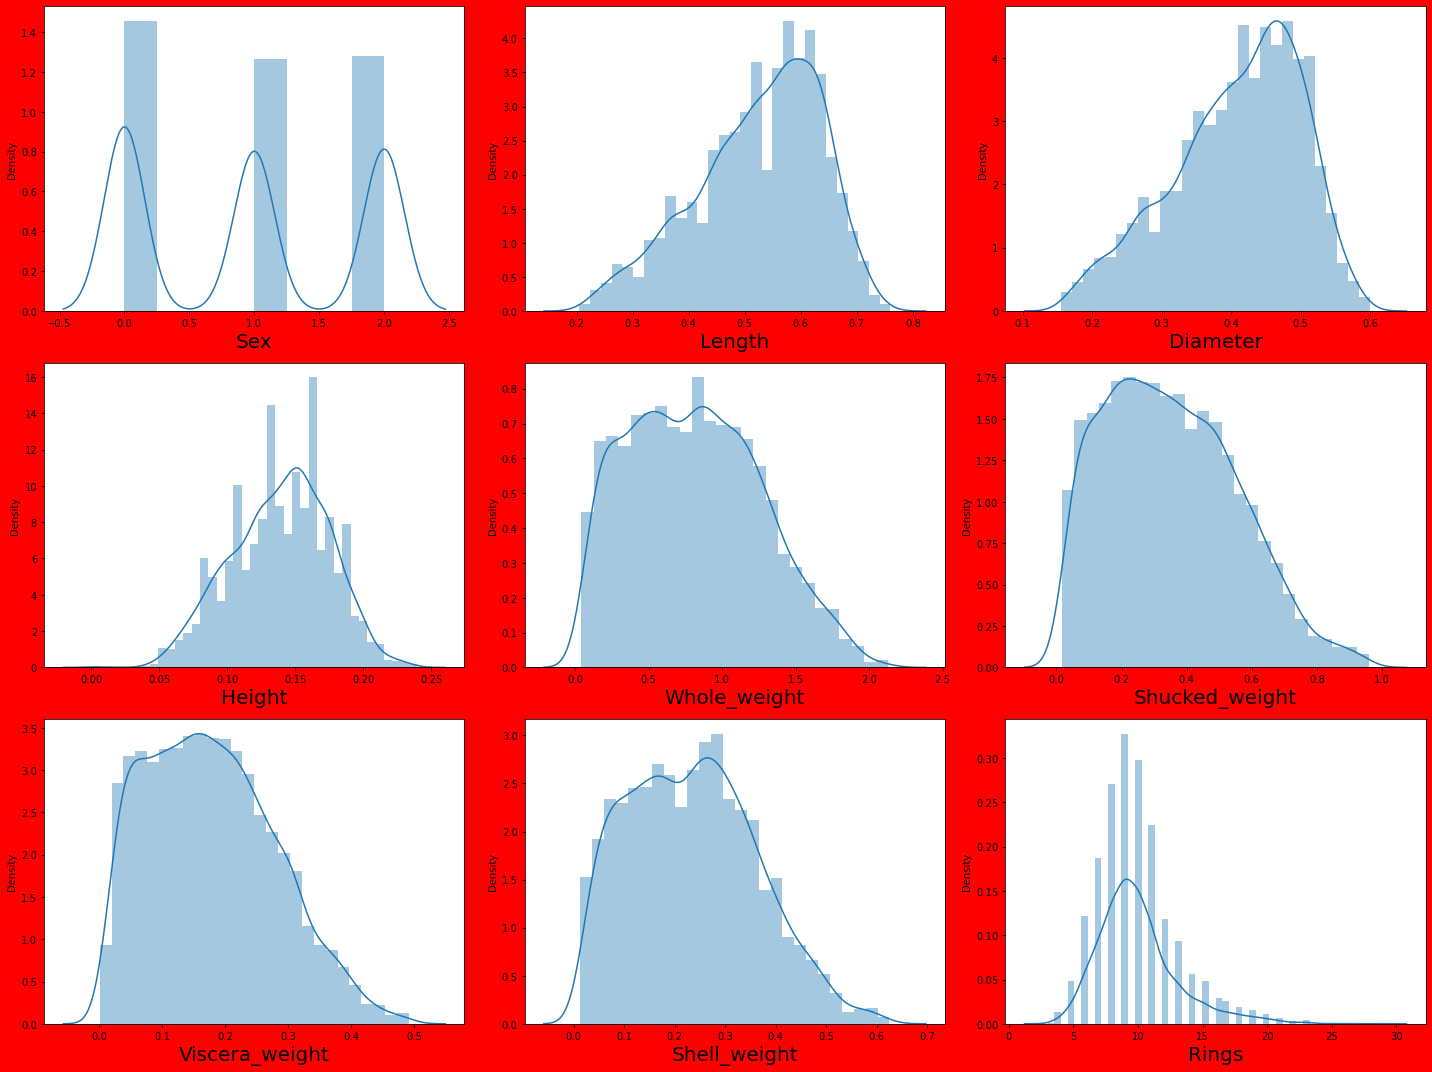

In [30]:
#checking whether the outliers are removed or not
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [32]:
# the data distribution seems to be good enough and we do not observe any skewness so now lets move on to find the 
# relation between the features and labels

y=data['Rings']
x=data.drop(columns=['Rings'])

In [33]:
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [34]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

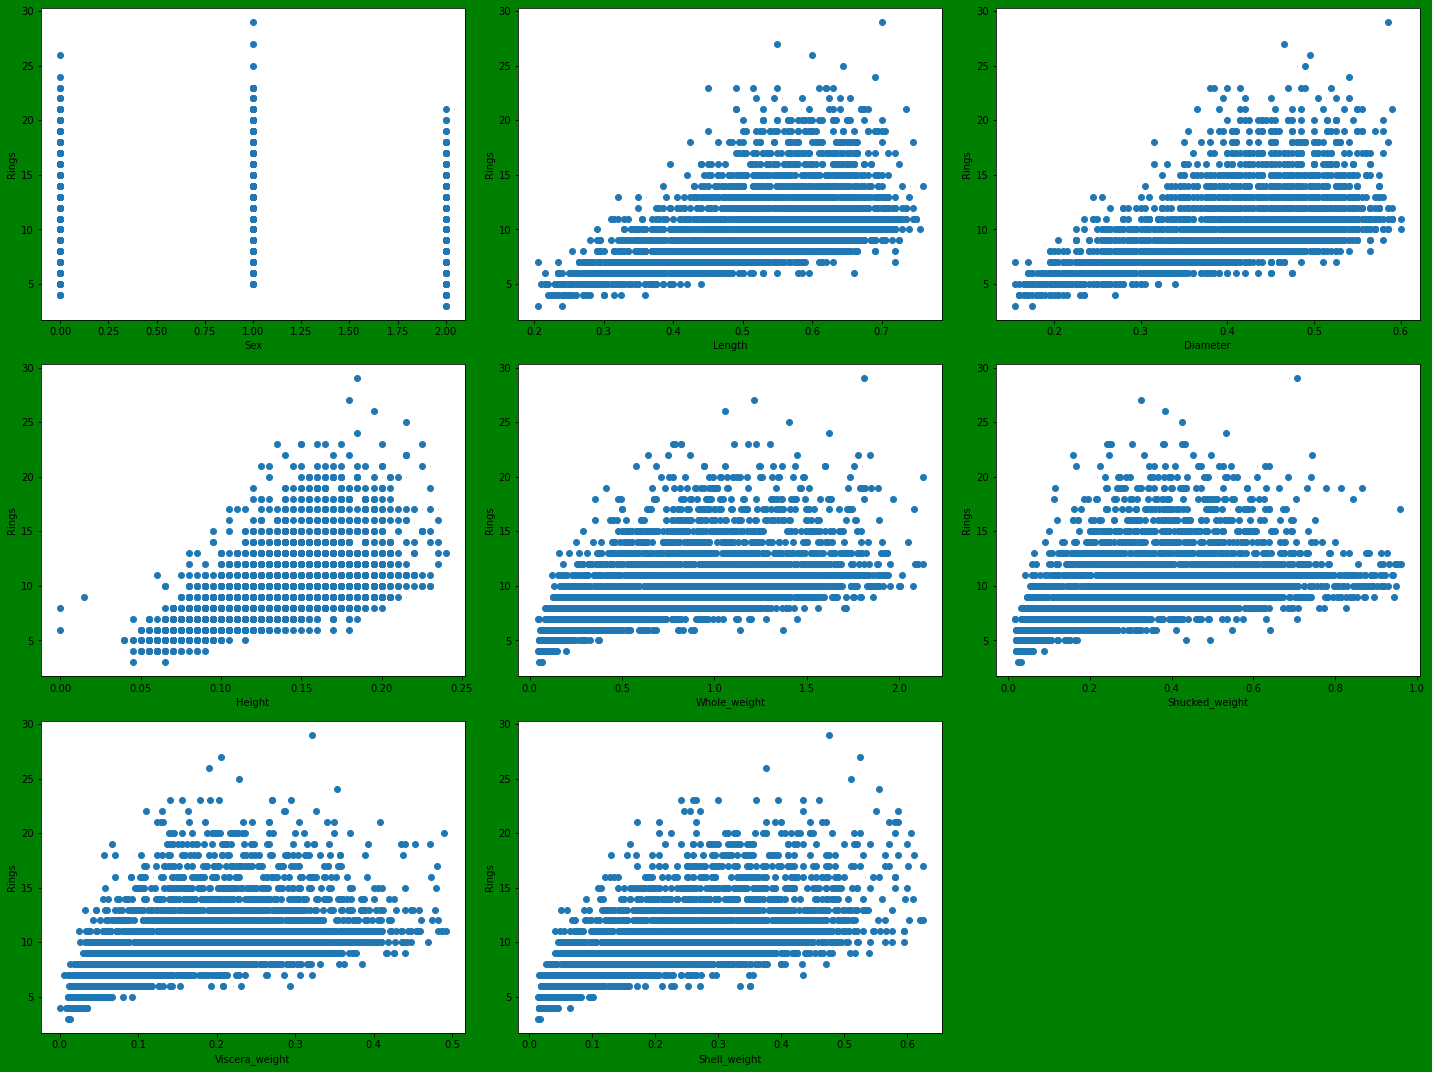

In [35]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Rings',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [36]:
#we can see that all the features having continious data are showing a positive relationship.

In [ ]:
#as here the label has continious data so we will use linear regression here


In [38]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [39]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)
y_train.head()


3930    21
426     18
3497     9
3718     7
254     15
Name: Rings, dtype: int64

In [40]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [41]:
data.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,0,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [43]:
#prediction of no of rings (4176	0	0.710	0.555	0.195	1.9485	0.9455	0.3765	0.4950	12)
print('no. of rings are ', regression.predict(scalar.transform([[0,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950]])))

no. of rings are  [12.91503105]


In [44]:
#how well the model fits the training data
regression.score(x_train, y_train)

0.5260821829752302

In [45]:
#lets check how well the model fits the testing data
regression.score(x_test, y_test)

0.49738291673582635

In [46]:
y_pred=regression.predict(x_test)
y_pred

array([8.338138  , 9.0554273 , 8.7475174 , ..., 6.48410945, 8.59478287,
       7.68916624])

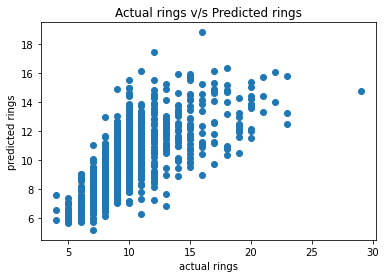

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual rings')
plt.ylabel('predicted rings')
plt.title('Actual rings v/s Predicted rings')
plt.show()